# Logistic Maps, Population Growth and Chaos from 

In [1]:
### Required for the Notebook to run properly ###
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, HBox, Layout,VBox
from IPython.display import clear_output, display, HTML
%matplotlib inline
### Required for the Notebook to run properly ###

The logistic mapping is a recurrence relation of degree 2 mathematically written as:  

$$x_{n+1}=rx_{n}(1-x_{n})$$

It was popularized in a 1976 paper by the biologist Robert May with one of the reasons for its popularity being its ability to show how chaotic behaviour can arise from very simple equations such as the one above.

In Python, this mapping can be easily written as

In [2]:
def logisticMapping(r, x):
    return r * x * (1 - x)

Plotting $x_{n+1}$ over $x_{n}$ returns nothing more than a simple quadratic curve. Below we have chosen $r = 2$ and $100$ evenly spaced numbers in the interval $[0,1]$ for $x$:

Text(0.5,1,'Plot of $x_{n+1}$ over $x_{n}$')

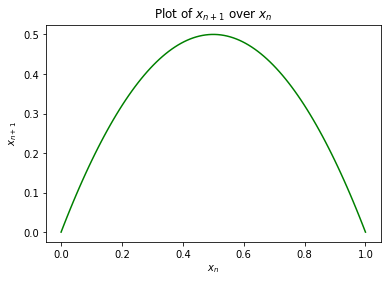

In [3]:
x = np.linspace(0, 1, 100)      # Generates 100 evenly spaced numbers in the interval [0,1]
fig, ax = plt.subplots(1, 1)    # Generates an empty plot object
ax.plot(x, logisticMapping(2, x), 'g')  # Plots x_n+1 over x_n
ax.set_ylabel('$x_{n+1}$')    # Sets the y label to x_n+1
ax.set_xlabel('$x_{n}$')    # Sets the title
ax.set_title('Plot of $x_{n+1}$ over $x_{n}$')    # Sets the y label to x_n+1

One particulaity of this mapping is that for certain values of r (from $0$ close to $3$), there is an eqilibrium that occurs and the values from the logistic mapping converge to a single value. For example, here is the plot for $r = 2$:

In [26]:
def layout(w):
    controls = HBox(w.children[:-1], layout = Layout(flex_flow='row wrap'))
    output = w.children[-1]
    output.layout.height = '550px'
    display(VBox([controls, output]))
    #without this ping - the visualization would only update when someone actually interacts with the controls
    w.children[1].value=w.children[1].value+1
    w.children[1].value=w.children[1].value-1

In [28]:
def multipleIterarations(r, iterations):
    values = [0.5]
    xn = 0.5;
    xAxis = [0]
    for i in range(0, iterations-1):
        xAxis.append(i)
        xn1 = logisticMapping(r, xn)
        values.append(xn1)
        xn = xn1

    fig, ax = plt.subplots(1, 1)    # Generates an empty plot object
    ax.plot(xAxis, values, 'r')
    ax.set_ylabel('$x_{n}$ value (starting at 0.5)')    # Sets the y label 
    ax.set_xlabel('Iterations (n)')    # Sets the x label 
    ax.set_title('$x_{n}$ values over iterations')    # Sets the title
    
w = interactive(multipleIterarations, r=(0.0,4.0), iterations=(10, 50))

layout(w)

Here is where the connection with population moddeling is made. This simple equation can be used to model a population of rabbits for example. 

In this case, $x_{n}$ could represents the current population of rabbits and $x_{n+1}$ the one in a year from now. $r$ would be the equivalent of the population growth of rabbits for that year while the term $1-x_{n}$ expresses the constraints on the population system. 

For $r<1$ the population will eventually reach $0$ after enough iterations (because the population keeps decreasing after each iteration).

For values in the interval $[1,3]$ the population reaches an equilibrium, a constant value.

But the really interesting behaviour occurs after $r>3$. The population count begins to oscillate, firstly between 2 values and afterwards 4 values and so on. This rapidly creates a higly chaotic behaviour. 

A way to visualise this chaotic bahaviour, is through a bifurcation diagram. 

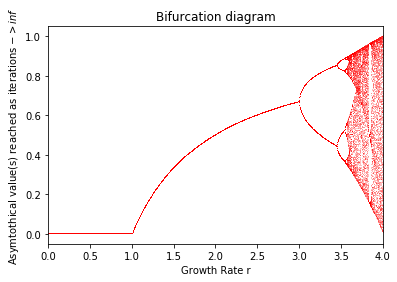

In [49]:
fig, ax = plt.subplots(1, 1)

def bifurcationDiagram(minValue):
    if(minValue>4.0 or minValue<0.0):
        print('The minimum value must be between 0.0 and 4.0')
        return
    iterations = 1000
    n = 1000
    last = 100
    x = 1e-5 * np.ones(n)
    r = np.linspace(minValue, 4.0, n)
    for i in range(iterations):
        x = logisticMapping(r, x)
        if i >= (iterations - last):
            ax.plot(r, x, ',r', alpha=.25)
    ax.set_xlim(minValue, 4)
    ax.set_ylabel('Asymtothical value(s) reached as iterations $-> inf$')
    ax.set_xlabel('Growth Rate r')
    ax.set_title("Bifurcation diagram")

bifurcationDiagram(0) # Change this value to anything in the range [0, 4)

This behaviour can be easily seen when calling: 
```python
bifurcationDiagram(0)
```

To observe the chaotic bahaviour, we can zoom on the mapping by calling 
```python
bifurcationDiagram(3.5)
```
or any other value closer to 4. 

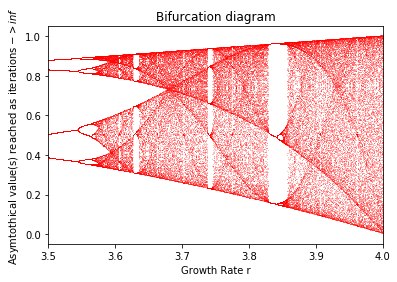

In [52]:
fig, ax = plt.subplots(1, 1)

bifurcationDiagram(3.5)

One thing to notice is that although the values appear random, there are 'calmer' regions such as the one around 3.85